# Classier Network Example: MINST Fashion
A simple example/test ClassifierNet object fund in NeuralNetworks, using classic example of the MNIST fashion data set: https://github.com/zalandoresearch/fashion-mnist

In [1]:
# Imports
import sys
sys.path.append('../')
from SimpleClassifier import SimpleClassifier
from BuildingBlocks import DenseBlock
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Loading the fashion data set
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Creating a key for the labels, to use in graphing etc.
label_key = {0:"T-Shirt/Top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",
    7:"Sneaker",8:"Bag",9:"Ankle boot"}

In [4]:
# Building the DNN using the ClassifierNet object.
# The arguments are: input dims (tuple), output dims (number of catagories), list of blocks:
block = DenseBlock([784, 196, 196, 49])
net = SimpleClassifier((28,28), 10, [block])

In [5]:
# Training the DNN
# Arguments are: training input (ndarray), training output (ndarray), batch size and epochs.
net.train(xtrain, ytrain, batch=5000, epochs=20)

Epoch 1/20
12/12 [==============================] - 3s 195ms/step - loss: 49.0885 - accuracy: 0.2335
Epoch 2/20
12/12 [==============================] - 2s 194ms/step - loss: 8.3005 - accuracy: 0.5620
Epoch 3/20
12/12 [==============================] - 2s 198ms/step - loss: 2.9009 - accuracy: 0.7069
Epoch 4/20
12/12 [==============================] - 3s 240ms/step - loss: 1.5579 - accuracy: 0.7578
Epoch 5/20
12/12 [==============================] - 2s 197ms/step - loss: 1.1693 - accuracy: 0.7832
Epoch 6/20
12/12 [==============================] - 2s 195ms/step - loss: 0.9347 - accuracy: 0.7920
Epoch 7/20
12/12 [==============================] - 2s 196ms/step - loss: 0.8117 - accuracy: 0.8010
Epoch 8/20
12/12 [==============================] - 2s 198ms/step - loss: 0.7275 - accuracy: 0.8098
Epoch 9/20
12/12 [==============================] - 2s 197ms/step - loss: 0.7574 - accuracy: 0.8058
Epoch 10/20
12/12 [==============================] - 3s 233ms/step - loss: 0.6371 - accuracy: 0.820

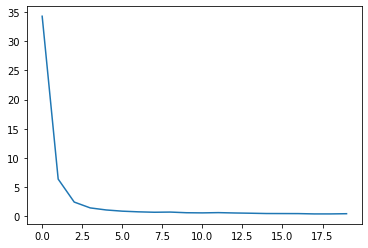

In [6]:
# Inspecting the Loss:
plt.plot(net.loss)

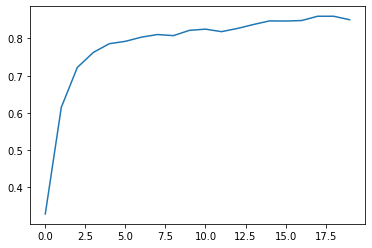

In [7]:
# Inspecting the Accuracy:
plt.plot(net.accuracy)

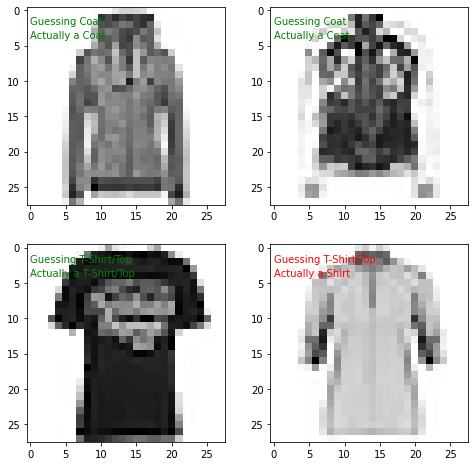

In [8]:
# Perhaps we wish to see what the DNN's guesses look like, so lets take a random
# sample of 4 of them, and display them along with what the guess is:
ims = np.random.randint(0, len(ytest), size=4)
guesses = net.predict(xtest[ims,:,:])
fig, axes = plt.subplots(2, 2, figsize=(8,8))
axs = [axes[0][0],axes[0][1],axes[1][0],axes[1][1]] # have to reindex them
for j in range(4):
    c = 'g' if guesses[j]==ytest[ims[j]] else 'r'
    axs[j].imshow(xtest[ims[j],:,:], cmap='Greys', interpolation='none')
    axs[j].text(0,2,"Guessing {}".format(label_key[guesses[j]]), color=c)
    axs[j].text(0,4,"Actually a {}".format(label_key[ytest[ims[j]]]), color=c)

We might reasonably wonder if the DNN has trouble distinguishing certain catagories or succeeds at disambiguating very different things, while failing to tell the difference between similar things. 

Text(0, 0.5, 'Network Guess')

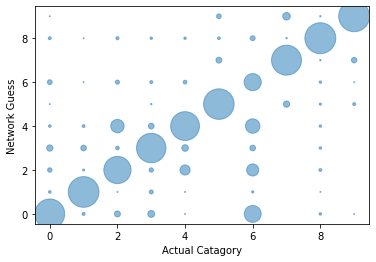

In [9]:
# Let's examine this using a bubble plot:
yguess = net.predict(xtest)
bubbles = np.zeros((10,10))
for i in range(len(ytest)):
    bubbles[yguess[i],ytest[i]] += 1
x = np.linspace(0,9,num=10); y = np.linspace(0,9,num=10)
x, y = np.meshgrid(x, y)
plt.scatter(x.reshape(100),y.reshape(100),s=bubbles.reshape(100),alpha=0.5)
plt.xlabel("Actual Catagory")
plt.ylabel("Network Guess")

This does appear to be the case, seeing that "shirt" (catagory 6) is often mistaken by the network for a "t-shirt" (0) or "pullover" (2). Similarly, a "coat" (4) is often mis-catagorized as a "pullover" (2). Meanwhile, it basically never mistakes a "sneaker" (7) for anything else, except occasionally an "ankle boot" (9) or "sandal" (5). This does seem to fluctuate based on retraining the network.